# Import libraries

In [1]:
# ! pip install faker 

In [2]:
import pandas as pd
import numpy as np
import random
from faker import Faker
from datetime import datetime, timedelta
from uuid import uuid4
from tqdm import tqdm
from random import randint, uniform
from faker.providers import BaseProvider
import warnings
warnings.simplefilter('ignore')

In [3]:
fake = Faker()
start_date = datetime(2018, 1, 1)
end_date = datetime(2024, 1, 1)

In [4]:
def generate_random_id():
    return(uuid4().hex)

# Data generation

## Region

In [5]:
world = pd.read_csv("../Data/worldcities.csv")
cameroon_cities = world[world['country']=='Cameroon']
gabon_cities = world[world['country']=='Gabon'].iloc[:5]
nigeria_cities = world[world['country']=='Nigeria'].iloc[:10]
cities = pd.concat([cameroon_cities, gabon_cities])
cities = pd.concat([cities, nigeria_cities])
print(cities.country.nunique())
print(cities.shape)
cities.head()

cities.to_csv("../Data/Train/region.csv")

3
(102, 11)


#### city repartition

In [6]:
# les villes les plus peuplés doivent avoir le plus de transaction

city_top5 = cameroon_cities.head(5)
city_top10 = cameroon_cities.head(10)

## Customer data

In [7]:
from random import randint, uniform
from faker.providers import BaseProvider

class CameroonPhoneProvider(BaseProvider):
    def phone_number(self):
        """Generates a fake Cameroon phone number in a random format."""
        formats = [
            "+237 65ABCDEFG",
            "+237 67ABCDEFG",
            "+237 68ABCDEFG",
            "+237 69ABCDEFG",
        ]
        format_str = formats[randint(0, len(formats) - 1)]
        phone_number = format_str.replace("A", str(randint(0, 9)))
        phone_number = phone_number.replace("B", str(randint(0, 9)))
        phone_number = phone_number.replace("C", str(randint(0, 9)))
        phone_number = phone_number.replace("D", str(randint(0, 9)))
        phone_number = phone_number.replace("E", str(randint(0, 9)))
        phone_number = phone_number.replace("F", str(randint(0, 9)))
        phone_number = phone_number.replace("G", str(randint(0, 9)))
        return phone_number

fake = Faker()
fake.add_provider(CameroonPhoneProvider)


In [8]:
# création de la première partie du dataFrame avant d'ajouter la répartition selon les villes
customers_list = []
for i in tqdm(range(10000)):
    first_name = fake.first_name()
    last_name = fake.last_name()
    domain = fake.domain_name()
    email = f"{first_name}.{last_name}@{domain}"
    phone_number = fake.phone_number()
    registration_date = fake.date_between(datetime(2005,1,1), datetime(2018,1,1))
    date_of_birth = fake.date_of_birth(minimum_age=30, maximum_age=75)
    address = fake.address()

    data_dict = {
        'customer_id' :generate_random_id(), 
        'first_name': first_name, 
        'last_name': last_name,
        'email': email,
        'phone_number': phone_number,
        'registration_date': registration_date,
        'date_of_birth' : date_of_birth,
        'address': address,
        }
    customers_list.append(data_dict)
customer_df = pd.DataFrame(customers_list)
print(customer_df.shape)

100%|██████████| 10000/10000 [00:45<00:00, 221.23it/s]

(10000, 8)


In [9]:
# scinder le df pour attribuer le plus de population aux grandes villes
customer_df_1 = customer_df.iloc[:4000]
customer_df_2 = customer_df.iloc[4000:7000].reset_index().drop(columns="index")
customer_df_3 = customer_df.iloc[7000:].reset_index().drop(columns="index")

In [10]:
city_1_list = []
for cust in customer_df_1.iterrows():
    city_1 = random.choice(list(city_top5.city))
    city_1_dict = {
        'city': city_1,
        'region' : cameroon_cities[cameroon_cities.city == city_1]['admin_name'].iloc[0]
    }
    city_1_list.append(city_1_dict)
customer_df_1[["city", "region"]] = pd.DataFrame(city_1_list)
customer_df_1.head()


,customer_id,first_name,last_name,email,phone_number,registration_date,date_of_birth,address,city,region
0,ca82adbe1216466889f3e6328fa5bde7,Lauren,Johns,Lauren.Johns@whitney.com,+237 696967497,2008-08-13,1971-05-29,"504 Christina Street\nNorth Julie, MT 51593",Bafoussam,Ouest
1,dfcd95dcab1445f8809502690486d475,Melanie,Moreno,Melanie.Moreno@jones.com,+237 690309646,2007-07-14,1955-03-24,"871 Dawn Keys\nWest Michael, MI 10452",Garoua,Nord
2,de1c16d91fd1403d8bf0bbb0af595836,Jeffrey,Jones,Jeffrey.Jones@martin.com,+237 674485475,2016-06-23,1966-10-07,"06574 Chris Summit Apt. 866\nBrownmouth, MS 22249",Douala,Littoral
3,cb6e161943574d049928df9764c01490,Ashley,Dixon,Ashley.Dixon@rivera.com,+237 696570847,2011-05-22,1967-10-26,"PSC 4375, Box 6072\nAPO AE 73657",Garoua,Nord
4,5ba16d58be8f41cf9d44814791be9ac6,Christina,Fernandez,Christina.Fernandez@ward.com,+237 674957482,2012-02-07,1958-12-05,"390 Linda Dam Suite 479\nShahside, NJ 90427",Douala,Littoral


In [11]:
city_2_list = []
for cust in customer_df_2.iterrows():
    city_2 = random.choice(list(city_top5.city))
    city_2_dict = {
        'city': city_2,
        'region' : cameroon_cities[cameroon_cities.city == city_2]['admin_name'].iloc[0]
    }
    city_2_list.append(city_2_dict)
customer_df_2[["city", "region"]] = pd.DataFrame(city_2_list)
customer_df_2.head()

,customer_id,first_name,last_name,email,phone_number,registration_date,date_of_birth,address,city,region
0,ae861384335a42e89f3aef354beb0968,Joseph,Reyes,Joseph.Reyes@woods.org,+237 699705274,2005-07-26,1983-12-28,"968 Lewis Crossing\nDanielston, MP 88215",Bafoussam,Ouest
1,e1b745200ee4437aa9a59c81d7e8806a,Jessica,Powell,Jessica.Powell@gray.net,+237 672285230,2012-02-28,1982-12-01,"49633 Heidi Expressway\nJamesview, HI 14742",Bafoussam,Ouest
2,fbabaf7a0cea489b88209799695c0390,Russell,Washington,Russell.Washington@barnes.net,+237 699054048,2012-11-27,1993-06-04,USNS King\nFPO AA 50145,Bamenda,North-West
3,ae074dbda32947f68ea76d4e2d4198b1,Rodney,Bruce,Rodney.Bruce@watkins-maldonado.com,+237 692940111,2016-08-12,1987-08-16,"164 Vincent Corners\nKennethview, PR 10322",Bafoussam,Ouest
4,0fb6e548e9f0446d9bf88d70310fdbaa,Charles,Burton,Charles.Burton@brown.info,+237 699036136,2016-10-22,1981-05-31,"579 Perez Streets\nOneillmouth, GU 24356",Garoua,Nord


In [12]:
city_3_list = []
for cust in customer_df_3.iterrows():
    city_3 = random.choice(list(cities.city))
    city_3_dict = {
        'city': city_3,
        'region' : cities[cities.city == city_3]['admin_name'].iloc[0]
    }
    city_3_list.append(city_3_dict)
customer_df_3[["city", "region"]] = pd.DataFrame(city_3_list)
customer_df_3.head()

,customer_id,first_name,last_name,email,phone_number,registration_date,date_of_birth,address,city,region
0,a5044a99279a4e6691c8b6fbdd492cfe,Jose,Johnson,Jose.Johnson@johnson-mcconnell.com,+237 692432288,2012-09-29,1973-07-22,29269 Beltran Gateway Apt. 119\nNorth Kristyvi...,Abuja,Federal Capital Territory
1,52ab94d1a8c845469701d1f41b74db1d,Charles,Chapman,Charles.Chapman@king.com,+237 673104212,2010-09-02,1993-05-19,"53298 Christy Estates Apt. 387\nNew Maryburgh,...",Bogo,Extrême-Nord
2,cf7503780c8e42e9adf5177cee4771bd,Jessica,Durham,Jessica.Durham@becker.net,+237 656536730,2016-05-10,1970-08-18,"867 Isaiah Row Apt. 834\nSamuelville, CT 34539",Bafanji,North-West
3,f58fe6ded09543bb8aead2b78056b97e,Susan,Cruz,Susan.Cruz@robinson.com,+237 692264670,2010-12-18,1969-12-26,"498 Holland Glens Apt. 720\nTranton, IN 05193",Akonolinga,Centre
4,1c46a0e084574b21ac76fb89f76baa7d,Kevin,Nelson,Kevin.Nelson@blackwell.biz,+237 684173298,2014-05-02,1981-08-17,"636 Jessica Isle\nSouth Jeffrey, WY 43288",Eséka,Centre


In [13]:
customer_df_final = pd.concat([customer_df_1, customer_df_2, customer_df_3], axis=0)
customer_df_final.head()

,customer_id,first_name,last_name,email,phone_number,registration_date,date_of_birth,address,city,region
0,ca82adbe1216466889f3e6328fa5bde7,Lauren,Johns,Lauren.Johns@whitney.com,+237 696967497,2008-08-13,1971-05-29,"504 Christina Street\nNorth Julie, MT 51593",Bafoussam,Ouest
1,dfcd95dcab1445f8809502690486d475,Melanie,Moreno,Melanie.Moreno@jones.com,+237 690309646,2007-07-14,1955-03-24,"871 Dawn Keys\nWest Michael, MI 10452",Garoua,Nord
2,de1c16d91fd1403d8bf0bbb0af595836,Jeffrey,Jones,Jeffrey.Jones@martin.com,+237 674485475,2016-06-23,1966-10-07,"06574 Chris Summit Apt. 866\nBrownmouth, MS 22249",Douala,Littoral
3,cb6e161943574d049928df9764c01490,Ashley,Dixon,Ashley.Dixon@rivera.com,+237 696570847,2011-05-22,1967-10-26,"PSC 4375, Box 6072\nAPO AE 73657",Garoua,Nord
4,5ba16d58be8f41cf9d44814791be9ac6,Christina,Fernandez,Christina.Fernandez@ward.com,+237 674957482,2012-02-07,1958-12-05,"390 Linda Dam Suite 479\nShahside, NJ 90427",Douala,Littoral


In [14]:
customer_df_final.to_csv('../Data/Train/customers.csv', index=False)

## Device data

In [15]:

#creation de id

def create_id():
    return str(uuid4())

#creation des types d'appareils
def generate_device_type():
    return random.choice(['mobile', 'tablette'])

#creation des os

def generate_os():
    return random.choice(['android', 'ios', 'mac', 'windows', 'linux'])

#creation des fabricants
manufacturer_and_model={
                        'dell':['XPS 13', 'INSPIRON 15', 'LATITUDE 7410', 'PRECISION 5550'],
                        'HP': ['spectre x360', 'envy 13', 'pavillon 15', 'OMEN 15'],
                        'LG': ['spectre x3670', 'envy45','Gram 17', 'Wing 5G', ' NanoCell TV'],
                        'SONY':['Xperia 1 III', 'Xperia 5 II', 'Bravia OLDE', 'VAIO SX14'],
                        'Apple':['iphone 13', 'ipad pro', 'iphone Xr'],
                        'Sharp':['Aquos R6', 'aquos sense 5g', ' dynabook v8']
                        }
#def generate_manufacturer():
    #return random.choices(['dell', 'hp', 'lg', 'sony', 'apple', 'sharp', 'lenovo', 'acer', 'tecno','itel', 'huawei', 'samsung', 'google'])

#creation des modeles

def generate_model(type):
    return random.choice(manufacturer_and_model[type])

#creation de la table devices

def create_devices_table(lenght= 100000):

    devices= pd.DataFrame()

    # les listes
    device_id_list=[]
    devices_type_list=[]
    devices_manufacturer_list=[]
    devices_model_list=[]
    devices_last_used_list=[]
    devices_os_list=[]

    #generer les valeurs
    for i in tqdm(range(lenght)):
        devices_id=create_id()
        devices_type= generate_device_type()
        devices_last_used= fake.date_time_between(start_date= '-5y', end_date='now')
        devices_os= generate_os()
        devices_manufacturer= random.choice(list(manufacturer_and_model.keys()))
        devices_model= generate_model(devices_manufacturer)

        #ajout dans les listes
        device_id_list.append(devices_id)
        devices_type_list.append(devices_type)
        devices_model_list.append( devices_model)
        devices_manufacturer_list.append( devices_manufacturer)
        devices_last_used_list.append(devices_last_used)
        devices_os_list.append(devices_os)
        
     #assigner aux colonnes de la table devices
    devices['device_id']= device_id_list
    devices['device_type']= devices_type_list
    devices['os']= devices_os_list
    devices['manufacturer']= devices_manufacturer_list
    devices['model']= devices_model_list
    devices['last_used']= devices_last_used_list

    return devices

devices= create_devices_table()
devices

100%|██████████| 100000/100000 [00:08<00:00, 12400.96it/s]


,device_id,device_type,os,manufacturer,model,last_used
0,3a329c73-0de9-46db-95cc-c00f5d2db145,tablette,android,HP,pavillon 15,2023-06-13 19:18:08
1,330a5087-e6d3-4b0f-bb41-0a1924e9f466,mobile,android,dell,INSPIRON 15,2022-06-26 04:08:05
2,7421e78e-2551-406a-88b1-2b2b4f4c768d,tablette,linux,Sharp,aquos sense 5g,2023-04-09 02:10:30
3,13158975-5429-4e4d-994c-7d2bd21c9923,tablette,mac,LG,spectre x3670,2023-11-01 12:19:19
4,7f5f4bee-9926-4129-b3bc-154bb9c250fb,mobile,linux,Apple,iphone Xr,2024-01-13 10:39:16
...,...,...,...,...,...,...
99995,792eefb3-8ad7-4305-ae2c-b8f9811ce407,mobile,linux,dell,INSPIRON 15,2023-02-20 22:16:55
99996,26fca293-96da-4ada-91ab-6072984f696a,mobile,windows,Sharp,Aquos R6,2019-12-09 06:50:45
99997,22b0f83d-9b22-464d-b968-2884d7aa6432,mobile,windows,SONY,Xperia 1 III,2024-07-25 22:34:15
99998,aab2c3a7-4cad-48cb-871a-e78b52a7e413,tablette,ios,SONY,Xperia 1 III,2019-11-08 14:43:53


In [16]:
devices.to_csv('../Data/Train/devices.csv', index=False)

## Transaction data

In [17]:
location_list = list(cities.city)
transaction_list=[]
customer_id_list = list(customer_df_final["customer_id"])

def is_fraud_trans(status):
    if status == "échouée":
        return 1
    else:
        return 0
    

trend_factor = 1.0001
seasonal_amplitude = 0.3
seasonal_period = 365 


for i in tqdm(range(100000)):
    transaction_id = generate_random_id()
    customer_id = random.choice(customer_id_list)
    transaction_type = random.choices(["retrait", "depôt", "transfert"], weights=[0.25, 0.5, 0.25])[0] # liste pondérée
    device_id = random.choice(list(devices["device_id"]))
    choices = ["échouée", "réussie"]
    poids = [0.1, 0.9]
    status = random.choices(choices, weights=poids)[0] # liste pondérée
    days_between = (end_date - start_date).days
    transaction_date = start_date + timedelta(days=random.randint(0, days_between))

    # Calcul de la tendance
    days_since_start = (transaction_date - start_date).days
    trend = trend_factor ** days_since_start

    # Calcul de la saisonnalité
    seasonal_effect = 1 + seasonal_amplitude * np.sin(2 * np.pi * days_since_start / seasonal_period)

    # Montant ajusté par la tendance et la saisonnalité
    base_amount = random.uniform(100, 10000000)
    amount = base_amount * trend * seasonal_effect

    transaction_dict = {
        "transaction_id": transaction_id,
        "customer_id": customer_id,
        "device_id": device_id,
        "transaction_date": transaction_date,
        "transaction_type": transaction_type,
        "amount": amount,
        "status": status,
        "is_fraud": is_fraud_trans(status)
    }

    transaction_list.append(transaction_dict)

transaction_df = pd.DataFrame(transaction_list)
print(transaction_df.shape)
transaction_df.head()

100%|██████████| 100000/100000 [36:48<00:00, 45.27it/s] 


(100000, 8)


,transaction_id,customer_id,device_id,transaction_date,transaction_type,amount,status,is_fraud
0,73333c33388e4b2289c785a41fed02f2,f3d548b0bcb542519c27997a0f976286,03a3a7ce-d977-490e-9101-b28e3144a501,2020-04-26,depôt,1.295893e+07,réussie,0
1,c5664cec2e524715bc7d9bbffdb0447e,290d0c46a6d648ad91bb762070413065,06175197-3295-400b-bf35-2d7441f91c70,2018-07-29,depôt,6.915794e+06,réussie,0
2,5f254ce9d6704be184998a7d4ada9c33,4f61cf6caa824e3bb1b6b2063db08e5e,661b4317-7764-4d7a-8b8e-549b2dfb9218,2018-03-15,depôt,6.329827e+06,réussie,0
3,49a32997c4b24197823a89a57727c102,62a3c24e96ba44daa0849b89c1558867,eb4ce187-0e33-4baa-bab3-f2f074f769c2,2020-06-04,depôt,1.215674e+07,réussie,0
4,1302d8fe67a849dcbb0615919e65004c,1225ff1b60ab44dfbe2f5481528efffa,6aab79b4-7a01-4ae7-9697-357617bc4529,2022-03-02,retrait,1.183232e+07,réussie,0


In [18]:
transaction_df_1 = transaction_df.iloc[:40000]
transaction_df_2 = transaction_df.iloc[40000:70000].reset_index().drop(columns="index")
transaction_df_3 = transaction_df.iloc[70000:].reset_index().drop(columns="index")

In [19]:
location_1_list = []
for trans in transaction_df_1.iterrows():
    location_1 = random.choice(list(city_top5.city))
    location_1_dict = {
        'location': location_1,
    }
    location_1_list.append(location_1_dict)
transaction_df_1[["location"]] = pd.DataFrame(location_1_list)
print(transaction_df_1.isna().sum())
print("\n------------------------------------------------\n")


transaction_id      0
customer_id         0
device_id           0
transaction_date    0
transaction_type    0
amount              0
status              0
is_fraud            0
location            0
dtype: int64

------------------------------------------------



In [20]:
location_2_list = []
for trans in transaction_df_2.iterrows():
    location_2 = random.choice(list(city_top10.city))
    location_2_dict = {
        'location': location_2,
    }
    location_2_list.append(location_2_dict)
transaction_df_2[["location"]] = pd.DataFrame(location_2_list)
print(transaction_df_2.isna().sum())
print("\n------------------------------------------------\n")

transaction_id      0
customer_id         0
device_id           0
transaction_date    0
transaction_type    0
amount              0
status              0
is_fraud            0
location            0
dtype: int64

------------------------------------------------



In [21]:
location_3_list = []
for trans in transaction_df_3.iterrows():
    location_3 = random.choice(list(cities.city))
    location_3_dict = {
        'location': location_3,
    }
    location_3_list.append(location_3_dict)
transaction_df_3[["location"]] = pd.DataFrame(location_3_list)
print(transaction_df_3.isna().sum())
print("\n------------------------------------------------\n")

transaction_id      0
customer_id         0
device_id           0
transaction_date    0
transaction_type    0
amount              0
status              0
is_fraud            0
location            0
dtype: int64

------------------------------------------------



In [22]:
transaction_df_ = pd.concat([transaction_df_1, transaction_df_2, transaction_df_3])
transaction_df_.shape 

(100000, 9)

In [23]:
transaction_df_.isna().sum()

transaction_id      0
customer_id         0
device_id           0
transaction_date    0
transaction_type    0
amount              0
status              0
is_fraud            0
location            0
dtype: int64

#### location_fraud

In [24]:
is_fraud_list = []
for transaction in tqdm(transaction_df_.iterrows()):
    if transaction[1]['location'] not in list(cameroon_cities.city):
        is_fraud_list.append({'is_fraud':1})
    else:
        is_fraud_list.append({'is_fraud':transaction[1]['is_fraud']})
transaction_df_[['is_fraud']] = pd.DataFrame(is_fraud_list)
transaction_df_.head()

100000it [00:30, 3288.64it/s]


,transaction_id,customer_id,device_id,transaction_date,transaction_type,amount,status,is_fraud,location
0,73333c33388e4b2289c785a41fed02f2,f3d548b0bcb542519c27997a0f976286,03a3a7ce-d977-490e-9101-b28e3144a501,2020-04-26,depôt,1.295893e+07,réussie,0,Garoua
1,c5664cec2e524715bc7d9bbffdb0447e,290d0c46a6d648ad91bb762070413065,06175197-3295-400b-bf35-2d7441f91c70,2018-07-29,depôt,6.915794e+06,réussie,0,Yaoundé
2,5f254ce9d6704be184998a7d4ada9c33,4f61cf6caa824e3bb1b6b2063db08e5e,661b4317-7764-4d7a-8b8e-549b2dfb9218,2018-03-15,depôt,6.329827e+06,réussie,0,Douala
3,49a32997c4b24197823a89a57727c102,62a3c24e96ba44daa0849b89c1558867,eb4ce187-0e33-4baa-bab3-f2f074f769c2,2020-06-04,depôt,1.215674e+07,réussie,0,Bafoussam
4,1302d8fe67a849dcbb0615919e65004c,1225ff1b60ab44dfbe2f5481528efffa,6aab79b4-7a01-4ae7-9697-357617bc4529,2022-03-02,retrait,1.183232e+07,réussie,0,Garoua


### device_fraud

In [25]:
selection = pd.DataFrame(transaction_df_.device_id.value_counts()>=3).reset_index()
device_fraud = list(selection[selection['count']].device_id)
is_fraud_list = []
for transaction in tqdm(transaction_df_.iterrows()):
    if transaction[1]['device_id'] in device_fraud:
        is_fraud_list.append({'is_fraud':1})
    else:
        is_fraud_list.append({'is_fraud':transaction[1]['is_fraud']})
transaction_df_[['is_fraud']] = pd.DataFrame(is_fraud_list)
transaction_df_.head()

100000it [01:10, 1420.51it/s]


,transaction_id,customer_id,device_id,transaction_date,transaction_type,amount,status,is_fraud,location
0,73333c33388e4b2289c785a41fed02f2,f3d548b0bcb542519c27997a0f976286,03a3a7ce-d977-490e-9101-b28e3144a501,2020-04-26,depôt,1.295893e+07,réussie,0,Garoua
1,c5664cec2e524715bc7d9bbffdb0447e,290d0c46a6d648ad91bb762070413065,06175197-3295-400b-bf35-2d7441f91c70,2018-07-29,depôt,6.915794e+06,réussie,0,Yaoundé
2,5f254ce9d6704be184998a7d4ada9c33,4f61cf6caa824e3bb1b6b2063db08e5e,661b4317-7764-4d7a-8b8e-549b2dfb9218,2018-03-15,depôt,6.329827e+06,réussie,0,Douala
3,49a32997c4b24197823a89a57727c102,62a3c24e96ba44daa0849b89c1558867,eb4ce187-0e33-4baa-bab3-f2f074f769c2,2020-06-04,depôt,1.215674e+07,réussie,0,Bafoussam
4,1302d8fe67a849dcbb0615919e65004c,1225ff1b60ab44dfbe2f5481528efffa,6aab79b4-7a01-4ae7-9697-357617bc4529,2022-03-02,retrait,1.183232e+07,réussie,0,Garoua


In [26]:
transaction_df_final = transaction_df_
transaction_df_final.head()

,transaction_id,customer_id,device_id,transaction_date,transaction_type,amount,status,is_fraud,location
0,73333c33388e4b2289c785a41fed02f2,f3d548b0bcb542519c27997a0f976286,03a3a7ce-d977-490e-9101-b28e3144a501,2020-04-26,depôt,1.295893e+07,réussie,0,Garoua
1,c5664cec2e524715bc7d9bbffdb0447e,290d0c46a6d648ad91bb762070413065,06175197-3295-400b-bf35-2d7441f91c70,2018-07-29,depôt,6.915794e+06,réussie,0,Yaoundé
2,5f254ce9d6704be184998a7d4ada9c33,4f61cf6caa824e3bb1b6b2063db08e5e,661b4317-7764-4d7a-8b8e-549b2dfb9218,2018-03-15,depôt,6.329827e+06,réussie,0,Douala
3,49a32997c4b24197823a89a57727c102,62a3c24e96ba44daa0849b89c1558867,eb4ce187-0e33-4baa-bab3-f2f074f769c2,2020-06-04,depôt,1.215674e+07,réussie,0,Bafoussam
4,1302d8fe67a849dcbb0615919e65004c,1225ff1b60ab44dfbe2f5481528efffa,6aab79b4-7a01-4ae7-9697-357617bc4529,2022-03-02,retrait,1.183232e+07,réussie,0,Garoua


In [27]:
is_fraud_list = []
for transaction in tqdm(transaction_df_final.iterrows()):
    if transaction[1]['amount'] >= 7000000:
        is_fraud_list.append({'is_fraud':1})
    else:
        is_fraud_list.append({'is_fraud':transaction[1]['is_fraud']})
transaction_df_final[['is_fraud']] = pd.DataFrame(is_fraud_list)
transaction_df_final.head()

100000it [00:11, 8525.67it/s]


,transaction_id,customer_id,device_id,transaction_date,transaction_type,amount,status,is_fraud,location
0,73333c33388e4b2289c785a41fed02f2,f3d548b0bcb542519c27997a0f976286,03a3a7ce-d977-490e-9101-b28e3144a501,2020-04-26,depôt,1.295893e+07,réussie,1,Garoua
1,c5664cec2e524715bc7d9bbffdb0447e,290d0c46a6d648ad91bb762070413065,06175197-3295-400b-bf35-2d7441f91c70,2018-07-29,depôt,6.915794e+06,réussie,0,Yaoundé
2,5f254ce9d6704be184998a7d4ada9c33,4f61cf6caa824e3bb1b6b2063db08e5e,661b4317-7764-4d7a-8b8e-549b2dfb9218,2018-03-15,depôt,6.329827e+06,réussie,0,Douala
3,49a32997c4b24197823a89a57727c102,62a3c24e96ba44daa0849b89c1558867,eb4ce187-0e33-4baa-bab3-f2f074f769c2,2020-06-04,depôt,1.215674e+07,réussie,1,Bafoussam
4,1302d8fe67a849dcbb0615919e65004c,1225ff1b60ab44dfbe2f5481528efffa,6aab79b4-7a01-4ae7-9697-357617bc4529,2022-03-02,retrait,1.183232e+07,réussie,1,Garoua


In [28]:
transaction_df_final.is_fraud.value_counts()

is_fraud
1    56137
0    43863
Name: count, dtype: int64

<Axes: xlabel='is_fraud', ylabel='count'>

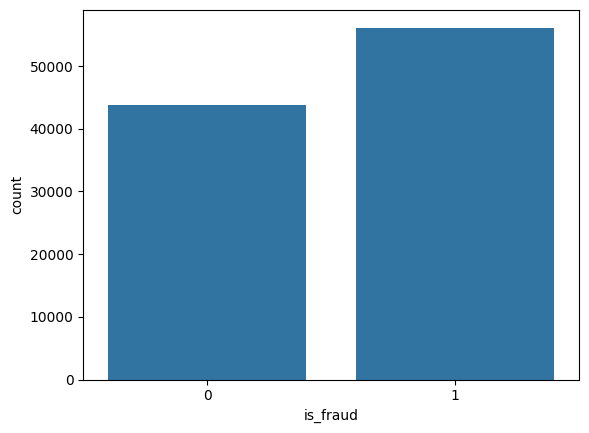

In [29]:
import seaborn as sns
sns.countplot(transaction_df_final, x='is_fraud')

In [30]:
transaction_df_final.to_csv('../Data/Train/transactions.csv', index=False)

## Transaction history data

In [31]:
transaction_history_list = []

for i, transaction in tqdm(transaction_df_final.iterrows()):
    history_id = generate_random_id()
    customer_id = transaction.customer_id
    transaction_id = transaction.transaction_id
    previous_balance = transaction.amount + uniform(0, 10000000)

    if transaction.transaction_type == "depôt":
        new_balance = previous_balance + transaction.amount
    else:
        new_balance = previous_balance - transaction.amount
        
    transaction_date = transaction.transaction_date

    transaction_history_dict = {
        "history_id" : history_id,
        "customer_id" : customer_id,
        "transaction_id" : transaction_id,
        "previous_balance" : previous_balance,
        "new_balance" : new_balance,
        "transaction_date": transaction_date
    }
    transaction_history_list.append(transaction_history_dict)

transaction_history_df = pd.DataFrame(transaction_history_list)
print(transaction_history_df.shape)
transaction_history_df.head()

100000it [00:22, 4483.41it/s]


(100000, 6)


,history_id,customer_id,transaction_id,previous_balance,new_balance,transaction_date
0,530531a66130493c97234331a971f24a,f3d548b0bcb542519c27997a0f976286,73333c33388e4b2289c785a41fed02f2,1.556544e+07,2.852437e+07,2020-04-26
1,8add621454c5445c973599dcc611c4bd,290d0c46a6d648ad91bb762070413065,c5664cec2e524715bc7d9bbffdb0447e,7.429107e+06,1.434490e+07,2018-07-29
2,5e845c3cf9e74fa5bd1e9b59a96f093a,4f61cf6caa824e3bb1b6b2063db08e5e,5f254ce9d6704be184998a7d4ada9c33,1.389950e+07,2.022932e+07,2018-03-15
3,687249a8a6124243a57ae2492dfcb0c3,62a3c24e96ba44daa0849b89c1558867,49a32997c4b24197823a89a57727c102,1.995273e+07,3.210947e+07,2020-06-04
4,ec04eeec18e34a8f99d7dc00a5cabc16,1225ff1b60ab44dfbe2f5481528efffa,1302d8fe67a849dcbb0615919e65004c,1.634117e+07,4.508849e+06,2022-03-02


In [32]:
transaction_history_df.to_csv('../Data/Train/transaction_history.csv', index=False)

## Transaction pattern data

In [33]:
customer_id_list = customer_df["customer_id"]
print(customer_id_list)

0       ca82adbe1216466889f3e6328fa5bde7
1       dfcd95dcab1445f8809502690486d475
2       de1c16d91fd1403d8bf0bbb0af595836
3       cb6e161943574d049928df9764c01490
4       5ba16d58be8f41cf9d44814791be9ac6
                      ...               
9995    b4aa444b73ce4ed2817b91839ec6496b
9996    370a61ceb54d4eb5855a71faaa25496e
9997    eaa6dc9165d049b197923d96d4d0dda5
9998    8b5471609d8e4ebb94a28f186123cfed
9999    2352d5de1c2748b0b4a07a2f8e16e119
Name: customer_id, Length: 10000, dtype: object


In [34]:
import numpy as np
import pandas as  pd 
import random
from faker import Faker
from uuid import uuid4
from tqdm import tqdm

faker= Faker()

# Fonction pour générer un identifiant unique
def create_id():
    return str(uuid4())

# Fonction pour générer un montant moyen aléatoire
def generate_average_amount():
    return round(random.uniform(5.0, 1000.0), 2)

# Fonction pour générer une fréquence de transactions aléatoire
def generate_frequency():
    return random.randint(1, 30)

# Fonction pour générer une localisation fréquente aléatoire
def generate_most_common_location():
    return faker.city()

# Fonction pour générer un appareil le plus utilisé aléatoire
def generate_most_common_device():
    return random.choice(['mobile', 'tablette'])

# Fonction pour créer une table de transaction patterns
def create_transaction_patterns_table(length=100000):

    transaction_patterns = pd.DataFrame()

    # Les listes
    pattern_id_list = []
    customer_id_list = customer_df["customer_id"].tolist()
    average_amount_list = []
    frequency_list = []
    most_common_location_list = []
    most_common_device_list = []
    foreign_key_list=[]  # liste des cles etrangeres qui seront aleatoirement choisies

    # Générer les valeurs
    for i in tqdm(range(length)):
        pattern_id = create_id()
        customer_id = random.choice(customer_id_list) 
        average_amount = generate_average_amount()
        frequency = generate_frequency()
        most_common_location = generate_most_common_location()
        most_common_device = generate_most_common_device()

        # Ajouter dans les listes
        pattern_id_list.append(pattern_id)
        foreign_key_list.append(customer_id)
        average_amount_list.append(average_amount)
        frequency_list.append(frequency)
        most_common_location_list.append(most_common_location)
        most_common_device_list.append(most_common_device)
    
    # Assigner aux colonnes de la table transaction patterns (en dehors de la boucle)
    transaction_patterns['pattern_id'] = pattern_id_list
    transaction_patterns['customer_id'] = foreign_key_list
    transaction_patterns['average_amount'] = average_amount_list
    transaction_patterns['frequency'] = frequency_list
    transaction_patterns['most_common_location'] = most_common_location_list
    transaction_patterns['most_common_device'] = most_common_device_list

    return transaction_patterns

# Créer une table de transaction patterns
transaction_patterns = create_transaction_patterns_table()

# Afficher les premières lignes de la table transaction patterns
transaction_patterns


100%|██████████| 100000/100000 [00:21<00:00, 4561.72it/s]


,pattern_id,customer_id,average_amount,frequency,most_common_location,most_common_device
0,b691a65a-f5fb-41e2-8bc1-8cdf18f1d694,72150ab714d04db49d6921e9c55dfc95,701.64,8,Patrickburgh,tablette
1,5704edab-4435-47db-a2e8-32d59231a896,0c97f1149d4d4ef7b5c884ed42ad6db6,829.13,13,Hernandezbury,mobile
2,08f83cf3-97b9-4dff-b27f-ba0e641b24f0,c91187c44dfe40e6b9d97e75734face6,117.46,16,Kaitlynborough,tablette
3,b401ea27-4535-4631-b878-018dbdae8f2b,a31f346968854615a1039f9f356fa1bf,917.64,13,Edwardsberg,mobile
4,2bef614b-2c5c-4487-8b0e-0d3924c0b591,081410fd4c834edf8ee86522a5fcf041,115.28,26,West Kristinamouth,mobile
...,...,...,...,...,...,...
99995,2e632e88-8f1a-42a7-9c7b-3510d8a8a505,2a9d39ef9d9843268194e44a9291de80,643.92,11,South Julieberg,tablette
99996,5ccc5643-25fe-43eb-9367-e7ffd8d9810d,5ac5164af9f44594b144a2fb10da5557,971.98,3,Lake Angelaburgh,tablette
99997,0783522d-a703-4ef8-8c5a-a06b530df29c,d5fe74bc551b4c1bb171acb282579a97,283.94,5,Jessicafurt,tablette
99998,0591b2d5-d168-4387-bfa9-a54d0c7f04ec,f4b88c102a1a4e0db660ead0a8143a7a,156.58,13,Holtburgh,mobile


In [35]:
transaction_patterns.to_csv('../Data/Train/transaction_patterns.csv', index=False)

## alerts data

In [36]:
# Fonction pour générer un identifiant unique
def create_id():
    return str(uuid4())

# Fonction pour générer une date et heure aléatoire
def generate_alert_date():
    return faker.date_time_between(start_date='-5y', end_date='now')

# Fonction pour générer un type d'alerte aléatoire
def generate_alert_type():
    return random.choice(['suspicious activity', 'large transaction'])

# Fonction pour générer un statut d'alerte aléatoire
def generate_alert_status():
    return random.choice(['open', 'closed'])

# Fonction pour générer une description d'alerte aléatoire
def generate_description():
    return faker.text(max_nb_chars=250)

# Fonction pour créer une table d'alertes
def create_alerts_table(length=100):

    alerts = pd.DataFrame()

    # Les listes
    alert_id_list = []
    transaction_id_list = transaction_df["customer_id"].tolist()
    alert_date_list = []
    alert_type_list = []
    alert_status_list = []
    description_list = []
    foreign_key_alerts_list=[]

    # Générer les valeurs
    for i in tqdm(range(length)):
        alert_id = create_id()
        transaction_id = random.choice(transaction_id_list) # Remplacer par un identifiant de transaction réel si disponible
        alert_date = generate_alert_date()
        alert_type = generate_alert_type()
        alert_status = generate_alert_status()
        description = generate_description()

        # Ajouter dans les listes
        alert_id_list.append(alert_id)
        foreign_key_alerts_list.append(transaction_id)
        alert_date_list.append(alert_date)
        alert_type_list.append(alert_type)
        alert_status_list.append(alert_status)
        description_list.append(description)
    
    # Assigner aux colonnes de la table alerts (en dehors de la boucle)
    alerts['alert_id'] = alert_id_list
    alerts['transaction_id'] = foreign_key_alerts_list
    alerts['alert_date'] = alert_date_list
    alerts['alert_type'] = alert_type_list
    alerts['alert_status'] = alert_status_list
    alerts['description'] = description_list

    return alerts

# Créer une table d'alertes
alerts = create_alerts_table()

# Afficher les premières lignes de la table alerts
alerts

100%|██████████| 100/100 [00:00<00:00, 1923.10it/s]


,alert_id,transaction_id,alert_date,alert_type,alert_status,description
0,1c968713-a301-48d7-90ce-59b398e0f488,4bbfedd3defa4ca3b061b275fa070f96,2020-05-11 08:41:07,large transaction,open,Much turn should machine together. Prove adult...
1,ad39f695-235f-4bd6-af73-b704d1cd1ea8,eb2195bfbd47455199fc8b704e8d983a,2020-04-04 22:09:55,suspicious activity,closed,Report population benefit. Policy trip audienc...
2,59975c39-1ad2-48dc-a37f-8ec7f832a9a1,45f67eeb27b84c32a015ae85048ff1aa,2022-10-08 10:31:28,suspicious activity,open,Strategy tonight near sort. Investment student...
3,002998c9-1abe-4bc7-b949-6c7d771b2f97,95668b7022524674888f802e6c06f547,2023-04-09 04:08:37,large transaction,closed,Himself office small peace understand worker s...
4,34729344-a30d-477e-8198-585799f3696c,f4c01d5bf39245978f156fb3f289a348,2024-04-10 17:18:40,large transaction,open,Ago person away forward night. Town yes proper...
...,...,...,...,...,...,...
95,a94cef01-30d1-45a2-b0ff-ae458f433574,c9ca98ccd53046d894e1729bbff999ba,2021-12-10 01:08:53,suspicious activity,open,Hit value perhaps attorney actually herself fo...
96,cb155430-c98d-467b-828b-f5510041067d,deb0c250817e43b8b2fc214b2ee83b09,2024-06-25 18:16:35,large transaction,open,Exactly pay man three pick parent office. Clos...
97,8b9a4b6e-c1cd-44dc-9d39-f9bf793aacaa,b7aae19a7d81447aa5179575a2cba32e,2022-06-28 17:53:59,large transaction,closed,Together fly however successful sing decision ...
98,89e4aeb9-1eed-45dd-9a42-dcb443097fc2,f5188b03ac8645d8a0052efb7d13dc92,2020-05-16 06:35:04,large transaction,open,Fish couple safe music forget speak. Week pret...


In [37]:
alerts.to_csv('../Data/Train/alerts.csv', index=False)

## fraude_cases data 

In [38]:
from tqdm import tqdm
import pandas as pd
import numpy as np
import random
import uuid 
from faker import Faker
from datetime import datetime, timedelta


In [39]:


def generate_ID():
  return str(uuid.uuid1())


    
transaction_id_list = transaction_df["transaction_id"].tolist()
customer_id_list = customer_df["customer_id"].tolist()
                         
    
    


In [40]:
nb = 1000
generate_id_case = [generate_ID() for i in tqdm(range(nb))]
generate_id_transaction = [random.choice([transaction_id_list]) for i in tqdm(range(nb))]
generate_id_customer = [random.choice(customer_id_list) for i in tqdm(range(nb))]

#generation des données 
Data = {
  "case_id" : generate_id_case,
  "transaction_id" : generate_id_transaction,
  "customer_id" : generate_id_customer,
  "fraud_type" :[random.choice(["identity theft"," account takeover"]) for i in tqdm(range(nb))],
  "detection_Date" : [fake.date_between(start_date, end_date) for i in tqdm(range(nb))],
  "resolution_status" : [random.choice(["pending", "resolved"]) for i in tqdm(range(nb))],
  "comment_fraud" : [ fake.text(50) for i in tqdm(range(nb))],
}


100%|██████████| 1000/1000 [00:00<00:00, 10619.84it/s]


In [41]:
fraud_df = pd.DataFrame(Data)
print(fraud_df.shape)
fraud_df.head()


(1000, 7)


,case_id,transaction_id,customer_id,fraud_type,detection_Date,resolution_status,comment_fraud
0,cf27a2ec-63f4-11ef-bcf6-9cb6d0da64b6,"[73333c33388e4b2289c785a41fed02f2, c5664cec2e5...",97a02087fe084655a3362b02deb2be82,identity theft,2020-05-16,pending,Meeting key actually heart.
1,cf27a2ed-63f4-11ef-b961-9cb6d0da64b6,"[73333c33388e4b2289c785a41fed02f2, c5664cec2e5...",5a76e04ed527438eb8a391884be32967,account takeover,2020-10-01,pending,Involve only her give popular.
2,cf27a2ee-63f4-11ef-a01d-9cb6d0da64b6,"[73333c33388e4b2289c785a41fed02f2, c5664cec2e5...",20ffb7138f3a4054a543e5bf78dd4217,account takeover,2018-03-31,resolved,Fish decide war school. Seem sign look foreign.
3,cf27a2ef-63f4-11ef-8d41-9cb6d0da64b6,"[73333c33388e4b2289c785a41fed02f2, c5664cec2e5...",898e4b0561cd46a79729962197d50a56,identity theft,2022-07-24,resolved,Day adult view north service.
4,cf27a2f0-63f4-11ef-a6fe-9cb6d0da64b6,"[73333c33388e4b2289c785a41fed02f2, c5664cec2e5...",37ae1ea502c44fe4b724d089b83a8071,account takeover,2018-06-07,pending,Hour theory agree despite. Evening low bar.


## regions data

In [42]:
from glob import glob

list_data = glob('../Data/Train/*')
print(list_data)


['../Data/Train\\alerts.csv', '../Data/Train\\customers.csv', '../Data/Train\\devices.csv', '../Data/Train\\region.csv', '../Data/Train\\transactions.csv', '../Data/Train\\transaction_history.csv', '../Data/Train\\transaction_patterns.csv']


In [43]:
import os 
os.sep

'\\'

In [44]:
list_data[0].split(os.sep)[-1].split('.')[0]

'alerts'